# Importing Necessary Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import copy

from statsmodels.tsa.stattools import adfuller

import datetime

# Defining Parameters

In [2]:
path = 'C:/Users/prash/Downloads/ALGO TRADING/Statistical Arbitrage Pair Trading/'

In [3]:
variables = ['Pair Ratio', 'logA', 'logB', 'Spread', 'ADF Test', 
             'Mean', 'Std Dev', 'Z Score', 'Signal', 'Buy Price',
            'Sell Price', 'Long Return', 'Short Return', 'Slippage',
            'Total Return', 'Transaction Ratio', 'Trade Close']

In [4]:
mean = 35
critical_value = -2.58

trigger = 1
close = 0.5

slippage = -0.0025

start_date = pd.to_datetime('2005-01-01')
end_date = pd.to_datetime('2014-11-23')

# Importing Dataset

In [5]:
data = pd.read_csv(path + 'database/Banks/' + 'SbkRmb.csv')

data.columns = ['Date', 'A', 'B']
data['Date'] = pd.to_datetime(data['Date'])


data.head()

,Date,A,B
0,2004-05-12,3890,1412.0
1,2004-05-13,3850,1460.0
2,2004-05-14,3726,1415.0
3,2004-05-17,3825,1450.0
4,2004-05-18,3800,1405.0


# Initializing Variables in a Dataframe

In [6]:
for variable in variables:
    data[variable] = float(0)

data.head()

,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
0,2004-05-12,3890,1412.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004-05-13,3850,1460.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004-05-14,3726,1415.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004-05-17,3825,1450.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004-05-18,3800,1405.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Pair Ratio, LogA, LogB

In [7]:
data['Pair Ratio'] = data['A'] / data['B']

data['logA'] = np.log10(data['A'])
data['logB'] = np.log10(data['B'])

data.head()

,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
0,2004-05-12,3890,1412.0,2.754958,3.589950,3.149835,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004-05-13,3850,1460.0,2.636986,3.585461,3.164353,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2004-05-14,3726,1415.0,2.633216,3.571243,3.150756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2004-05-17,3825,1450.0,2.637931,3.582631,3.161368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2004-05-18,3800,1405.0,2.704626,3.579784,3.147676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Spread

In [8]:
for i in range(data.shape[0]):
    if(i>130):
        begin = i - mean
        end = i

        data['Spread'][i] = data['Pair Ratio'][i]
        
data.tail()

C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
2876,2015-11-17,13604,8953.030303,1.519486,4.133667,3.951970,1.519486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2877,2015-11-18,13515,8853.712121,1.526478,4.130816,3.947125,1.526478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2878,2015-11-19,14000,9107.045455,1.537271,4.146128,3.959378,1.537271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2879,2015-11-20,13981,9263.939394,1.509185,4.145538,3.966796,1.509185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2880,2015-11-23,13741,9212.121212,1.491622,4.138018,3.964360,1.491622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# ADF Test

In [9]:
for i in range(data.shape[0]):
    if(i>130):
        
        begin = i - mean
        end = i
        
        if(adfuller(data['Spread'][i-120:end].values)[0] < critical_value):
            if(adfuller(data['Spread'][i-90:end].values)[0] < critical_value):
                if(adfuller(data['Spread'][i-60:end].values)[0] < critical_value):
                    data['ADF Test'][end] = 1
            
data.tail()

c:\users\prash\appdata\local\programs\python\python36\lib\site-packages\statsmodels\regression\linear_model.py:889: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\users\prash\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
2876,2015-11-17,13604,8953.030303,1.519486,4.133667,3.951970,1.519486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2877,2015-11-18,13515,8853.712121,1.526478,4.130816,3.947125,1.526478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2878,2015-11-19,14000,9107.045455,1.537271,4.146128,3.959378,1.537271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2879,2015-11-20,13981,9263.939394,1.509185,4.145538,3.966796,1.509185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2880,2015-11-23,13741,9212.121212,1.491622,4.138018,3.964360,1.491622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Mean, Std Dev, Z Score

In [10]:
for i in range(data.shape[0]):
    if(i>130):
        
        begin = i - mean
        end = i
        
        if(i>=mean):
            
            data['Mean'][i] = data['Spread'][begin:end].mean()
            data['Std Dev'][i] = data['Spread'][begin:end].std()
            data['Z Score'][i] = (data['Spread'][i] - data['Mean'][i])/data['Std Dev'][i]
        
        
data.tail()

C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in double_scalars
  # This is added back by InteractiveShellApp.init_path()
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launc

,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
2876,2015-11-17,13604,8953.030303,1.519486,4.133667,3.951970,1.519486,0.0,1.487675,0.033399,0.952464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2877,2015-11-18,13515,8853.712121,1.526478,4.130816,3.947125,1.526478,0.0,1.490134,0.032441,1.120338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2878,2015-11-19,14000,9107.045455,1.537271,4.146128,3.959378,1.537271,0.0,1.493097,0.030802,1.434139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2879,2015-11-20,13981,9263.939394,1.509185,4.145538,3.966796,1.509185,0.0,1.496703,0.028193,0.442749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2880,2015-11-23,13741,9212.121212,1.491622,4.138018,3.964360,1.491622,0.0,1.498878,0.025989,-0.279187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Signal

In [11]:
for i in range(data.shape[0]):
    if(i>130):
        
        begin = i - mean
        end = i
        
        if(i>=mean):
            
            cur_signal = data['Signal'][i]
            prev_signal = data['Signal'][i-1]
            
            if(data['ADF Test'][i] == 1):
                
                if((cur_signal == 1 and prev_signal == -1) or (cur_signal == -1 and prev_signal == 1)):
                    data['Signal'][i] = 0
                elif(data['Z Score'][i] > trigger):
                    data['Signal'][i] = 1
                elif(data['Z Score'][i] < -trigger):
                    data['Signal'][i] = -1
                elif((data['Z Score'][i] < close) and (data['Z Score'][i] > -close)):
                    data['Signal'][i] = 0
                else:
                    data['Signal'][i] = prev_signal
            
            else:
                data['Signal'][i] = 0
                
                
data.tail()

C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\prash\AppData\Roaming\Python\Python36

,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
2876,2015-11-17,13604,8953.030303,1.519486,4.133667,3.951970,1.519486,0.0,1.487675,0.033399,0.952464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2877,2015-11-18,13515,8853.712121,1.526478,4.130816,3.947125,1.526478,0.0,1.490134,0.032441,1.120338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2878,2015-11-19,14000,9107.045455,1.537271,4.146128,3.959378,1.537271,0.0,1.493097,0.030802,1.434139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2879,2015-11-20,13981,9263.939394,1.509185,4.145538,3.966796,1.509185,0.0,1.496703,0.028193,0.442749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2880,2015-11-23,13741,9212.121212,1.491622,4.138018,3.964360,1.491622,0.0,1.498878,0.025989,-0.279187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Buy Price, Sell Price, Transaction Ratio

In [12]:
for i in range(data.shape[0]):
    if(i>130):
        
        begin = i - mean
        end = i
        
        if(i>=mean):
            
            cur_signal = data['Signal'][i]
            prev_signal = data['Signal'][i-1]
            
            if((cur_signal == 0) and (prev_signal == 0)):
                data['Buy Price'][i] = 0
                data['Transaction Ratio'][i] = 0
                data['Sell Price'][i] = 0
                
            elif(cur_signal == prev_signal):
                data['Buy Price'][i] = data['Buy Price'][i-1]
                data['Transaction Ratio'][i] = data['Transaction Ratio'][i-1]
                data['Sell Price'][i] = data['Sell Price'][i-1]
                
            elif((cur_signal == 1) and (cur_signal != prev_signal)):
                data['Buy Price'][i] = data['A'][i]
                data['Sell Price'][i] = data['B'][i] * data['Pair Ratio'][i]
                data['Transaction Ratio'][i] = data['Pair Ratio'][i]
                
            elif((cur_signal == -1) and (cur_signal != prev_signal)):
                data['Buy Price'][i] = data['B'][i] * data['Pair Ratio'][i]
                data['Transaction Ratio'][i] = data['Pair Ratio'][i]
                data['Sell Price'][i] = data['A'][i]
                
            elif((cur_signal == 0) and (prev_signal == 1)):
                data['Buy Price'][i] = data['A'][i]
                data['Transaction Ratio'][i] = data['Transaction Ratio'][i-1]
                data['Sell Price'][i] = data['B'][i] * data['Transaction Ratio'][i]
                
            elif((cur_signal == 0) and (prev_signal == -1)):
                data['Transaction Ratio'][i] = data['Transaction Ratio'][i-1]
                data['Buy Price'][i] = data['B'][i] * data['Transaction Ratio'][i]
                data['Sell Price'][i] = data['A'][i]
                
                
data.tail()            
            

C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import k

,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
2876,2015-11-17,13604,8953.030303,1.519486,4.133667,3.951970,1.519486,0.0,1.487675,0.033399,0.952464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2877,2015-11-18,13515,8853.712121,1.526478,4.130816,3.947125,1.526478,0.0,1.490134,0.032441,1.120338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2878,2015-11-19,14000,9107.045455,1.537271,4.146128,3.959378,1.537271,0.0,1.493097,0.030802,1.434139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2879,2015-11-20,13981,9263.939394,1.509185,4.145538,3.966796,1.509185,0.0,1.496703,0.028193,0.442749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2880,2015-11-23,13741,9212.121212,1.491622,4.138018,3.964360,1.491622,0.0,1.498878,0.025989,-0.279187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Long Return, Short Return, Total Return, Slippage, Trade Close

In [13]:
for i in range(data.shape[0]):
    if(i>130):
        
        begin = i - mean
        end = i
        
        if(i>=mean):
            
            if(data['Signal'][i-1] > 0):
                data['Long Return'][i] = np.log(data['A'][i] / data['A'][i-1])
                data['Short Return'][i] = np.log(data['B'][i] / data['B'][i-1]) * data['Transaction Ratio'][i]
                
            elif(data['Signal'][i-1] < 0):
                data['Long Return'][i] = np.log(data['B'][i] / data['B'][i-1]) * data['Transaction Ratio'][i]
                data['Short Return'][i] = np.log(data['A'][i] / data['A'][i-1])
                
            if((data['Signal'][i] == 0) and (data['Signal'][i-1] != 0)):
                data['Slippage'][i] = slippage
                data['Trade Close'][i] = 1
                
            data['Total Return'][i] = ((data['Short Return'][i] + data['Long Return'][i]) / 2) + data['Slippage'][i]
            
            
data.tail()

C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\prash\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

,Date,A,B,Pair Ratio,logA,logB,Spread,ADF Test,Mean,Std Dev,Z Score,Signal,Buy Price,Sell Price,Long Return,Short Return,Slippage,Total Return,Transaction Ratio,Trade Close
2876,2015-11-17,13604,8953.030303,1.519486,4.133667,3.951970,1.519486,0.0,1.487675,0.033399,0.952464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2877,2015-11-18,13515,8853.712121,1.526478,4.130816,3.947125,1.526478,0.0,1.490134,0.032441,1.120338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2878,2015-11-19,14000,9107.045455,1.537271,4.146128,3.959378,1.537271,0.0,1.493097,0.030802,1.434139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2879,2015-11-20,13981,9263.939394,1.509185,4.145538,3.966796,1.509185,0.0,1.496703,0.028193,0.442749,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2880,2015-11-23,13741,9212.121212,1.491622,4.138018,3.964360,1.491622,0.0,1.498878,0.025989,-0.279187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filtering out Dates

In [14]:
data_filtered = data[data['Date'] >= start_date]
data_filtered = data_filtered[data_filtered['Date'] <= end_date]
data_filtered

# Results

In [16]:
pos_trades = data_filtered[data_filtered['Total Return'] > 0]
neg_trades = data_filtered[data_filtered['Total Return'] < 0]

total_trades_count = (pos_trades.shape[0] + neg_trades.shape[0])
pos_trades_count = pos_trades.shape[0]
neg_trades_count = neg_trades.shape[0]

print("Total Trades: ", total_trades_count)
print("Success Ratio: ",(pos_trades_count / total_trades_count))
print("PnL Ratio: ", (pos_trades['Total Return'].mean() / neg_trades['Total Return'].mean()))

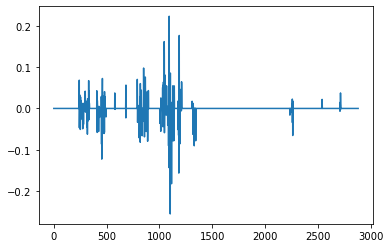

In [18]:
plt.plot(data['Total Return'])
#plt.xticks(list(data['Date']),rotation=20)